# EPFL - Statistical learning (MATH-412) - Week 1 
## Exercise 1.3

In [1]:
import os
import numpy as np
from week1 import utils 
import matplotlib.pyplot as plt

1\. Write a code that performs a kNN method for classification.

The method "knn_estimate" is implemented in utils 

2\. Train your method on the dataset simclass1train, for $k = 1, 2, . . . , 30$. Compute the training error, this time based on the zero-one loss for classification.

In [2]:
# File used in the exercise
class_train_file = os.path.join(os.getcwd(), 'week1', 'data', 'simclass1_train.csv')

# Load the csv files
class_train = np.genfromtxt(class_train_file, delimiter=';')
label_train = class_train[1:,0]
x_train = np.array(class_train[1:,1] + class_train[1:,2])

# Neighbour sizes
list_neighbour_size = range(1,30)

# Output variables
label_nn_train = []
train_loss = []

# Local variable used in the loop
it = 0

# KNN estimation for all the neighbour sizes
for neighbour_size in list_neighbour_size:
    label_nn_train.append(utils.knn_estimate(x_train, x_train, label_train, neighbour_size=neighbour_size))
    train_loss.append(utils.compute_classification_error(label_nn_train[it], label_train))
    it+=1

The training error is stored in the list "train_loss"

3\. For each $k$, calculate the test error of the kNN method with the dataset simclass1test.
Plot a graph of the training and test errors over k. Discuss.

In [5]:
# File used in the exercise
class_test_file = os.path.join(os.getcwd(), 'week1', 'data', 'simclass1_test.csv')

# Load the csv files
class_test = np.genfromtxt(class_test_file, delimiter=';')
label_test = class_test[1:,0]
x_test = np.array(class_test[1:,1] + class_test[1:,2])


# Output variables
label_nn_test = []
test_loss = []

# Local variable used in the loop
it = 0

# KNN estimation for all the neighbour sizes
for neighbour_size in list_neighbour_size:
    label_nn_test.append(utils.knn_estimate(x_test, x_train, label_train, neighbour_size=neighbour_size))
    test_loss.append(utils.compute_classification_error(label_nn_test[it], label_test))
    it+=1

The test error is stored in the list "test_loss"

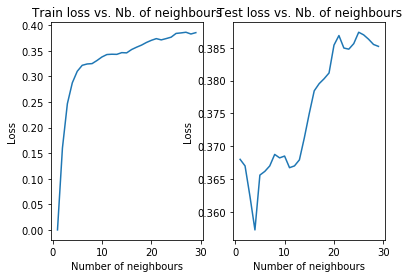

In [5]:
# Plot train and test errors
plt.figure()
plt.subplot(121)
plt.plot(list_neighbour_size, train_loss)
plt.ylabel('Loss')
plt.xlabel('Number of neighbours')
plt.title('Train loss vs. Nb. of neighbours')
plt.subplot(122)
plt.plot(list_neighbour_size, test_loss)
plt.ylabel('Loss')
plt.xlabel('Number of neighbours')
plt.title('Test loss vs. Nb. of neighbours')
plt.show()

The test and train losses exhibit a similar behaviour. They increase with the model order which is coherent with the bias-variance tradeoff explained in class.